> # <p style="background-color:#FFC0CB; font-family:newtimeroman;color:#FF29ED;font-size:220%; text-align:center; border-radius: 15px 55px;"> Business| EDA| DEPI</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df5=pd.read_csv('/kaggle/input/cleaned/cleaned_data final.csv')

# <p style="background-color:#FFC0CB; font-family:newtimeroman;color:#FF29ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> ⚛ Dataset Analysis ⚛</p>

## 1. Sales Performance

In [3]:
# Total sales for each product category and sub-category
sales_by_category = df5.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()
sales_by_category = sales_by_category.sort_values(by=['Category', 'Sub-Category'], ascending=True)
sales_by_category

,Category,Sub-Category,Sales
0,Furniture,Bookcases,75575.7316
1,Furniture,Chairs,220596.9850
2,Furniture,Furnishings,60520.3760
3,Furniture,Tables,134581.4235
4,Office Supplies,Appliances,71819.0080
5,Office Supplies,Art,16422.4040
6,Office Supplies,Binders,147734.7850
7,Office Supplies,Envelopes,10994.4200
8,Office Supplies,Fasteners,1786.0060
9,Office Supplies,Labels,7527.6700


In [4]:
# Sales by Region
sales_by_region = df5.groupby('Region')['Sales'].sum().reset_index()
sales_by_region

,Region,Sales
0,Central,342225.6916
1,East,463223.3870
2,South,230533.2635
3,West,463553.0400


In [5]:
# Sales by Shipping Mode
sales_by_ship_mode = df5.groupby('Ship Mode')['Sales'].sum().reset_index()
sales_by_ship_mode

,Ship Mode,Sales
0,First Class,224116.7439
1,Same Day,76555.2320
2,Second Class,299994.1230
3,Standard Class,898869.2832


## 2. Customer Behavior

In [6]:
# Top 10 customers by total sales
top_customers = df5.groupby('Customer ID')['Sales'].sum().sort_values(ascending=False).head(10)
top_customers

Customer ID
TC-20980    18951.820
RB-19360    14649.476
AB-10105    12836.611
SC-20095    11951.482
GT-14710    11454.840
SV-20365    10547.854
HL-15040    10499.970
KL-16645    10180.514
SE-20110     9738.022
CJ-12010     9683.476
Name: Sales, dtype: float64

In [7]:
# Unique customers in each region
customers_by_region = df5.groupby('Region')['Customer ID'].nunique().reset_index()
customers_by_region

,Region,Customer ID
0,Central,523
1,East,586
2,South,415
3,West,610


## 3. Order Analysis

In [8]:
# Average order quantity across product categories
avg_quantity_category = df5.groupby('Category')['Quantity'].mean().reset_index()
avg_quantity_category

,Category,Quantity
0,Furniture,3.777778
1,Office Supplies,3.796243
2,Technology,3.729114


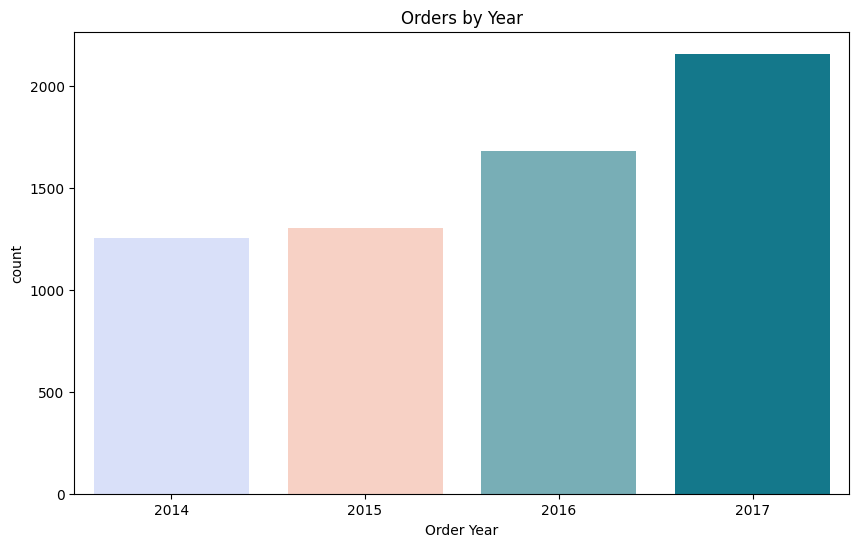

In [9]:
palette = { '#6eb5c0',  # Light teal
    '#ffccbd',  # Soft peach
     '#00859f',  # Dark teal
     '#d3ddff'   # Light blue
}
# Order date distribution
df5['Order Date'] = pd.to_datetime(df5['Order Date'], errors='coerce')
df5['Order Year'] = df5['Order Date'].dt.year

plt.figure(figsize=(10,6))
sns.countplot(data=df5, x='Order Year',palette=palette)
plt.title('Orders by Year')
plt.show()

## 4. Profitability and Discounts

In [10]:
# Average discount across regions
avg_discount_region = df5.groupby('Region')['Discount'].mean().reset_index()
avg_discount_region

,Region,Discount
0,Central,0.247343
1,East,0.145011
2,South,0.147468
3,West,0.108084


/tmp/ipykernel_17/3289592452.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df5, x='Discount', y='Sales',palette=palette)


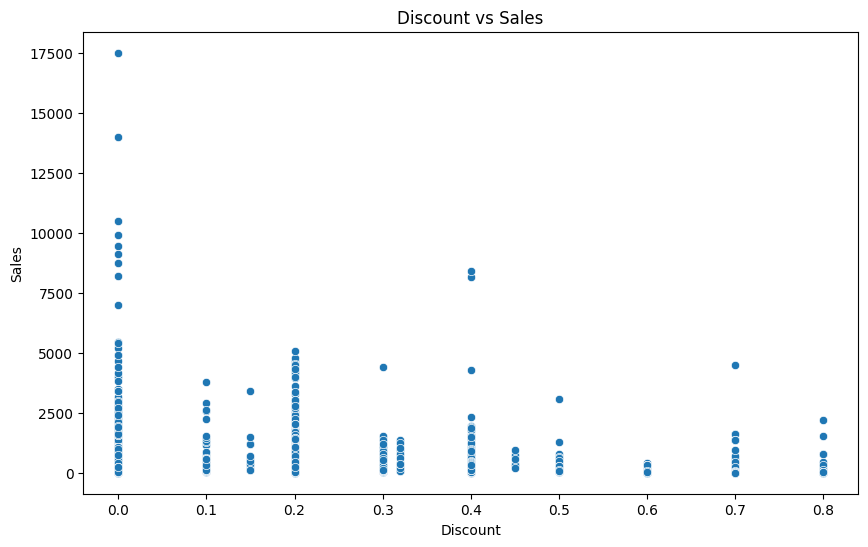

In [11]:
# Discounts and sales relationship
plt.figure(figsize=(10,6))
sns.scatterplot(data=df5, x='Discount', y='Sales',palette=palette)
plt.title('Discount vs Sales')
plt.show()

## 5. Shipping Modes

In [12]:
# Shipping modes by region
ship_mode_region = df5.groupby(['Region', 'Ship Mode']).size().unstack().fillna(0)
ship_mode_region

Ship Mode,First Class,Same Day,Second Class,Standard Class
Region,,,,
Central,205,76,296,932
East,299,97,348,1080
South,150,48,199,630
West,311,130,384,1210


## 6. Product Performance

7.Sales Trend Over Time (Yearly and Monthly)

/tmp/ipykernel_17/3271704591.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=sales_by_year, x='Year', y='Sales',palette=palette)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


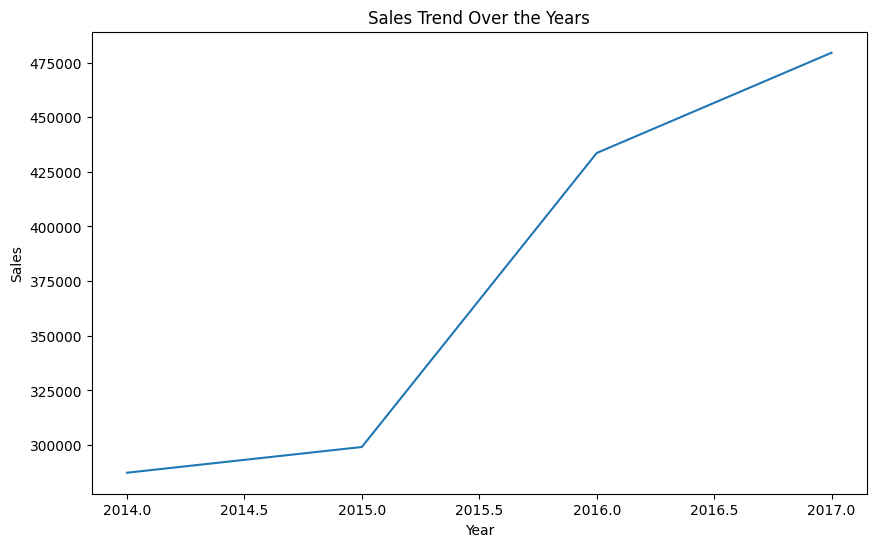

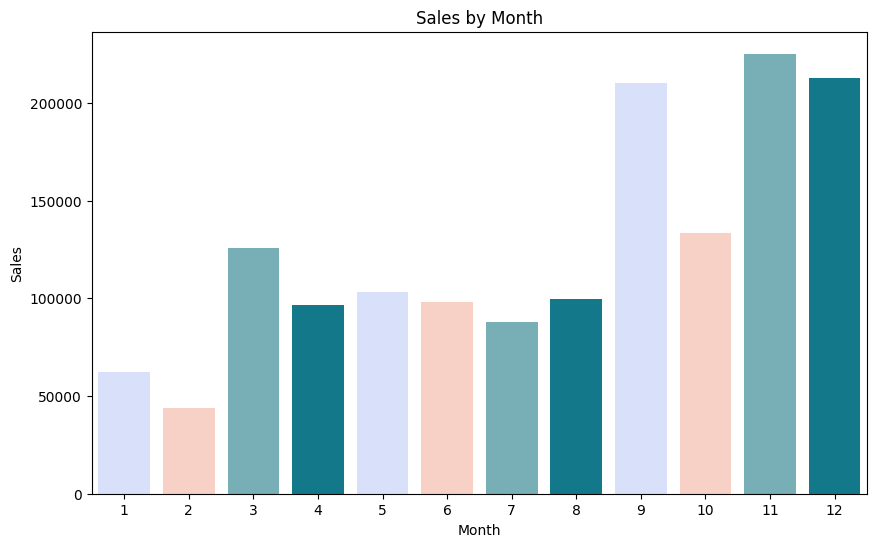

In [13]:
# Extract year and month from Order Date
df5['Order Date'] = pd.to_datetime(df5['Order Date'], errors='coerce')
df5['Year'] = df5['Order Date'].dt.year
df5['Month'] = df5['Order Date'].dt.month

# Group sales by year
sales_by_year = df5.groupby('Year')['Sales'].sum().reset_index()

# Plot sales trend over years
plt.figure(figsize=(10,6))
sns.lineplot(data=sales_by_year, x='Year', y='Sales',palette=palette)
plt.title('Sales Trend Over the Years')
plt.show()

# Group sales by month
sales_by_month = df5.groupby('Month')['Sales'].sum().reset_index()

# Plot sales trend by month
plt.figure(figsize=(10,6))
sns.barplot(data=sales_by_month, x='Month', y='Sales',palette=palette)
plt.title('Sales by Month')
plt.show()


8.Top Product Categories by Region

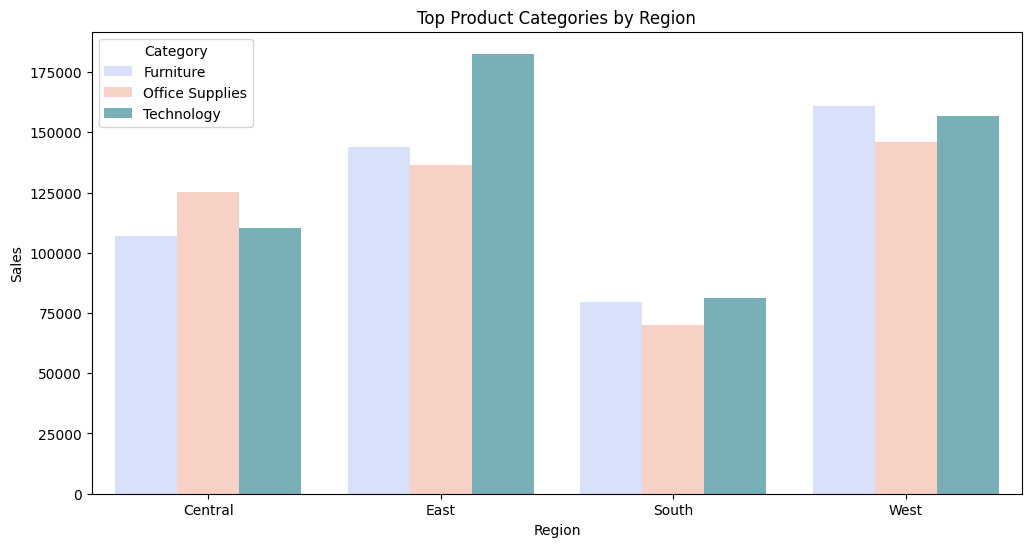

In [14]:
# Group sales by Category and Region
sales_by_category_region = df5.groupby(['Category', 'Region'])['Sales'].sum().reset_index()

# Plot top product categories in each region
plt.figure(figsize=(12,6))
sns.barplot(data=sales_by_category_region, x='Region', y='Sales', hue='Category',palette=palette)
plt.title('Top Product Categories by Region')
plt.show()


9. Customer Purchase Patterns Across Regions

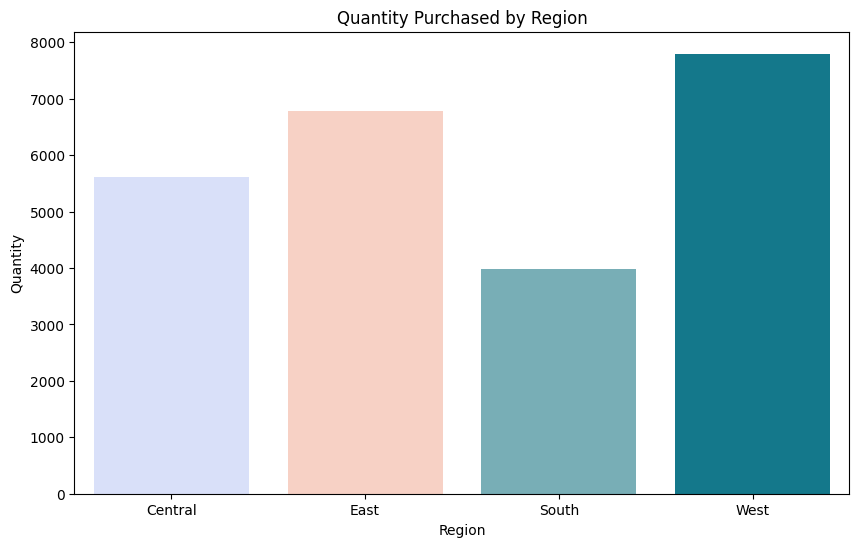

In [15]:
# Group quantity by Region
quantity_by_region = df5.groupby('Region')['Quantity'].sum().reset_index()

# Plot quantity distribution across regions
plt.figure(figsize=(10,6))
sns.barplot(data=quantity_by_region, x='Region', y='Quantity',palette=palette)
plt.title('Quantity Purchased by Region')
plt.show()


10. Discount Effectiveness on Sales

/tmp/ipykernel_17/3427228237.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df5, x='Discount', y='Sales',palette=palette)


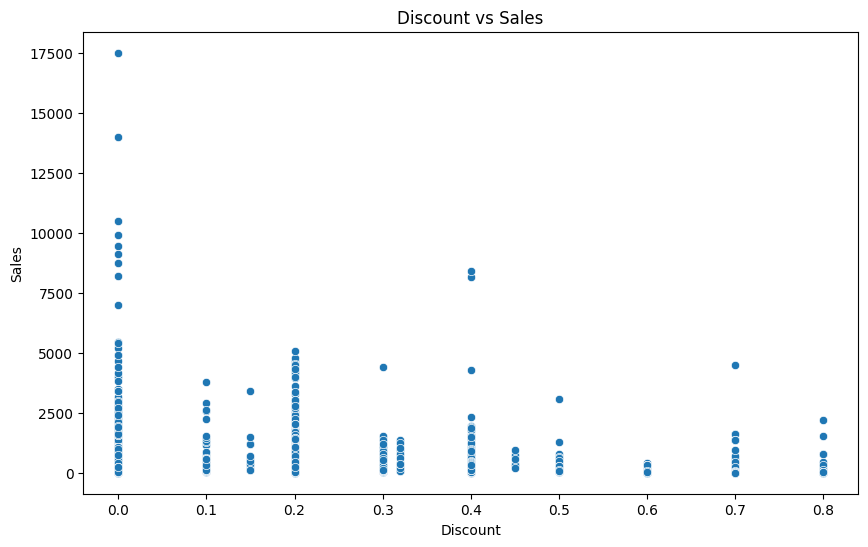

,Discount,Sales
Discount,1.000000,-0.043675
Sales,-0.043675,1.000000


In [16]:
# Scatter plot for discount vs sales
plt.figure(figsize=(10,6))
sns.scatterplot(data=df5, x='Discount', y='Sales',palette=palette)
plt.title('Discount vs Sales')
plt.show()

# Correlation between discount and sales
correlation = df5[['Discount', 'Sales']].corr()
correlation


/tmp/ipykernel_17/3427228237.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df5, x='Discount', y='Sales',palette=palette)


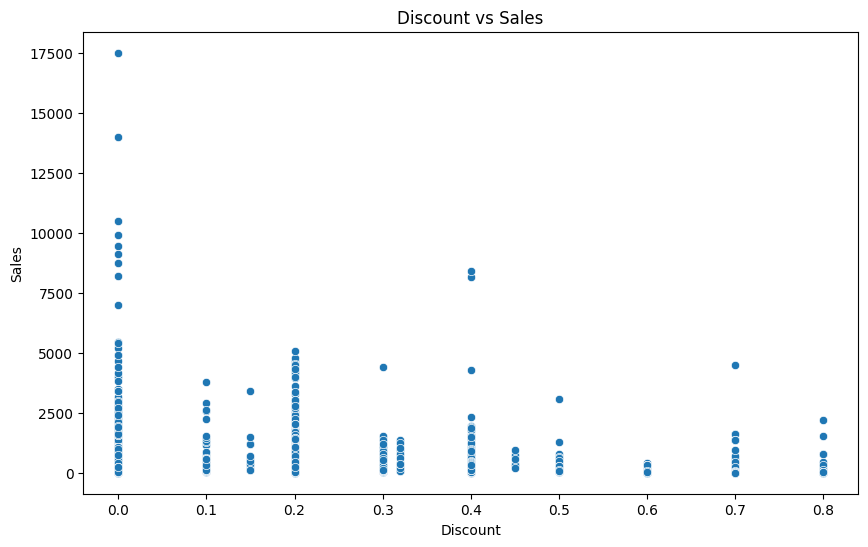

,Discount,Sales
Discount,1.000000,-0.043675
Sales,-0.043675,1.000000


In [17]:
# Scatter plot for discount vs sales
plt.figure(figsize=(10,6))
sns.scatterplot(data=df5, x='Discount', y='Sales',palette=palette)
plt.title('Discount vs Sales')
plt.show()

# Correlation between discount and sales
correlation = df5[['Discount', 'Sales']].corr()
correlation


11. Quantity Ordered by Product Sub-Category

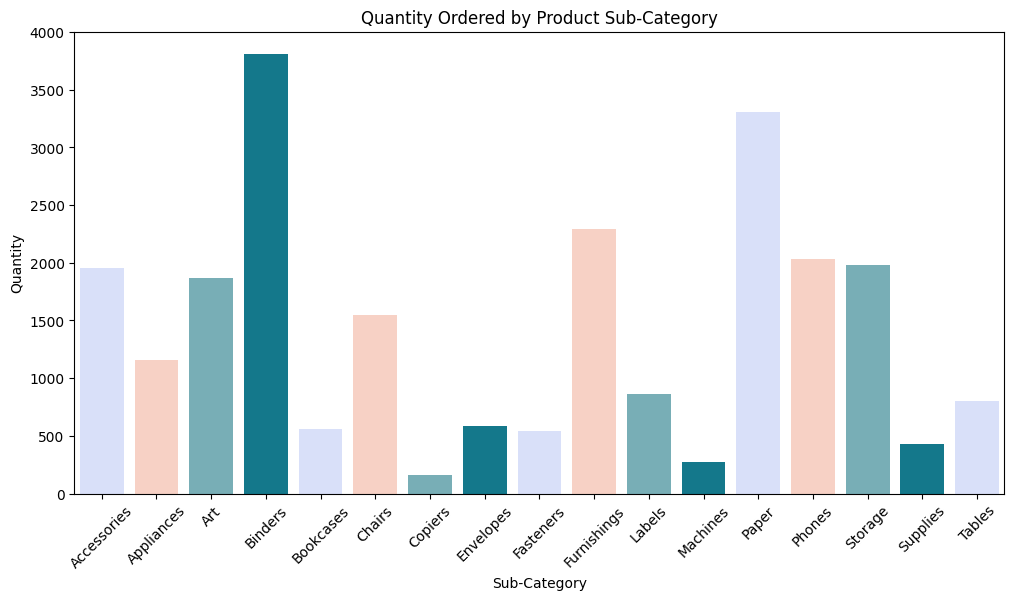

In [18]:
# Group quantity by sub-category
quantity_by_sub_category = df5.groupby('Sub-Category')['Quantity'].sum().reset_index()

# Plot quantity ordered by sub-category
plt.figure(figsize=(12,6))
sns.barplot(data=quantity_by_sub_category, x='Sub-Category', y='Quantity',palette=palette)
plt.xticks(rotation=45)
plt.title('Quantity Ordered by Product Sub-Category')
plt.show()


12. Sales Contribution by Category

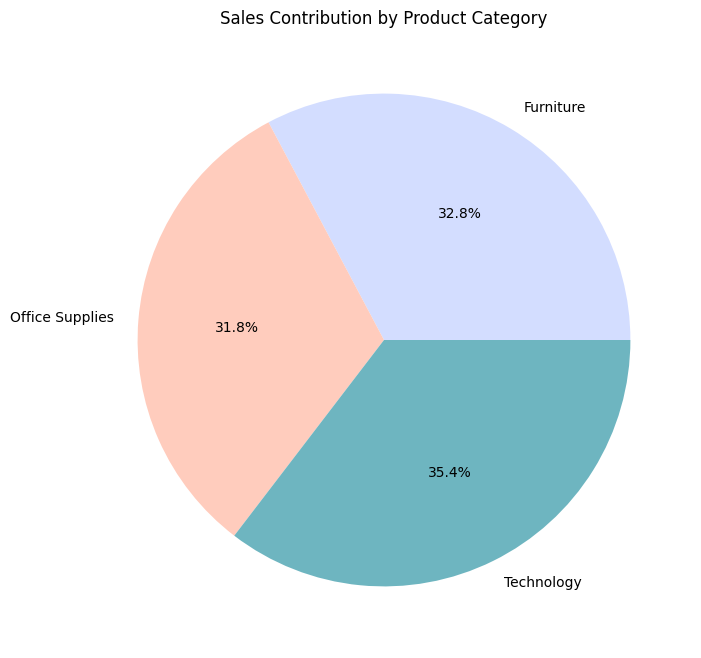

In [19]:
# Group sales by category
sales_by_category = df5.groupby('Category')['Sales'].sum().reset_index()

# Plot pie chart for sales contribution
plt.figure(figsize=(8,8))
plt.pie(sales_by_category['Sales'], labels=sales_by_category['Category'], autopct='%1.1f%%',colors=palette)
plt.title('Sales Contribution by Product Category')
plt.show()


### 13. What is the monthly sales trend for the top product category?

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


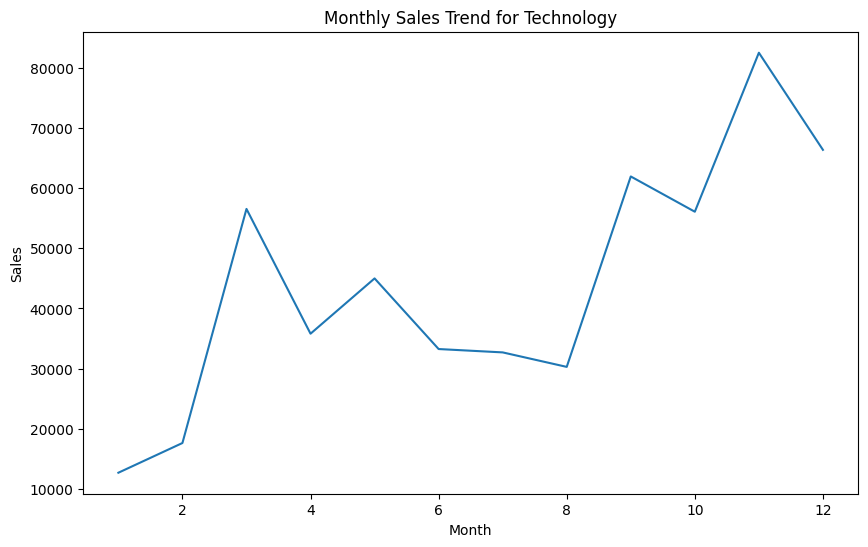

In [20]:
# Identify the top product category by total sales
top_category = df5.groupby('Category')['Sales'].sum().idxmax()

# Filter data for the top category
top_category_sales = df5[df5['Category'] == top_category]

# Group by month for sales trend in the top category
monthly_sales_top_category = top_category_sales.groupby('Month')['Sales'].sum().reset_index()

# Plot the monthly sales trend for the top product category
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_sales_top_category, x='Month', y='Sales')
plt.title(f'Monthly Sales Trend for {top_category}')
plt.show()


### 14. Which shipping mode has the highest average profit margin?

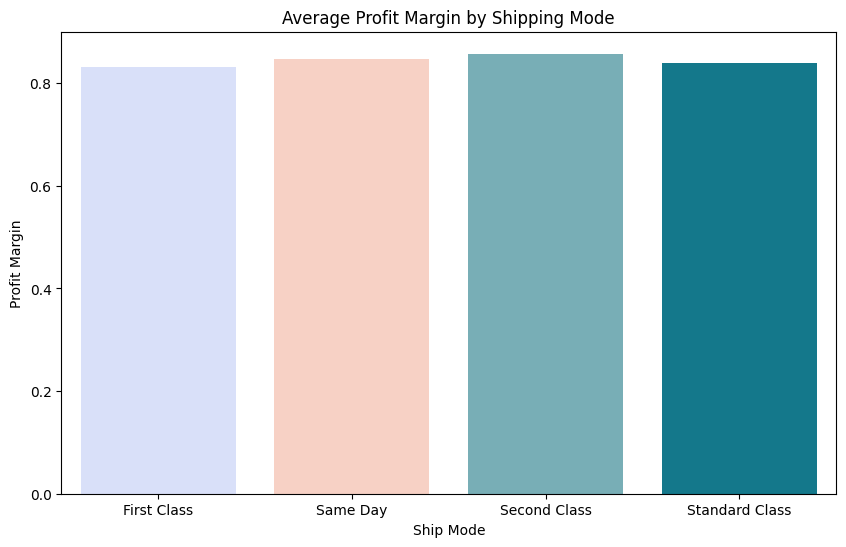

In [21]:
# Calculate the profit approximation based on Sales and Discount
df5['Profit'] = df5['Sales'] - (df5['Sales'] * df5['Discount'])

# Calculate profit margin (Profit / Sales)
df5['Profit Margin'] = df5['Profit'] / df5['Sales']

# Group by shipping mode to get the average profit margin
avg_profit_margin_by_ship_mode = df5.groupby('Ship Mode')['Profit Margin'].mean().reset_index()

# Plot the average profit margin by shipping mode
plt.figure(figsize=(10,6))
sns.barplot(data=avg_profit_margin_by_ship_mode, x='Ship Mode', y='Profit Margin',palette=palette)
plt.title('Average Profit Margin by Shipping Mode')
plt.show()


### 15.Which product sub-category has the highest discount and is it profitable?

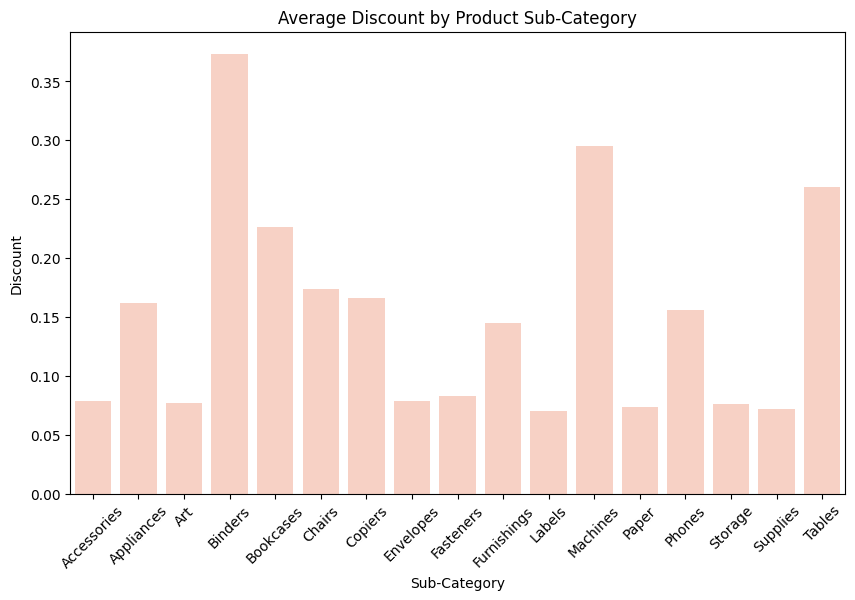

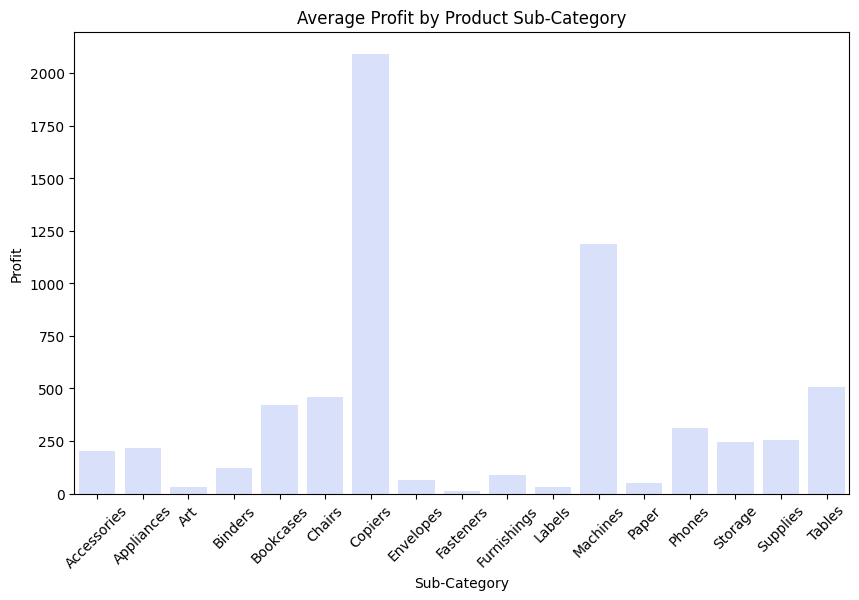

,Sub-Category,Discount,Profit
3,Binders,0.37349,120.806949


In [22]:
# Group by sub-category for average discount and profit
sub_category_discount_profit = df5.groupby('Sub-Category')[['Discount', 'Profit']].mean().reset_index()

# Find the sub-category with the highest average discount
highest_discount_sub_category = sub_category_discount_profit.sort_values(by='Discount', ascending=False).head(1)

# Plot the sub-category with highest discount and its profit
plt.figure(figsize=(10,6))
sns.barplot(data=sub_category_discount_profit, x='Sub-Category', y='Discount', color='#ffccbd')
plt.xticks(rotation=45)
plt.title('Average Discount by Product Sub-Category')

plt.figure(figsize=(10,6))
sns.barplot(data=sub_category_discount_profit, x='Sub-Category', y='Profit', color='#d3ddff')
plt.xticks(rotation=45)
plt.title('Average Profit by Product Sub-Category')
plt.show()

highest_discount_sub_category


### 16. What is the most popular product category based on order quantity in each region?

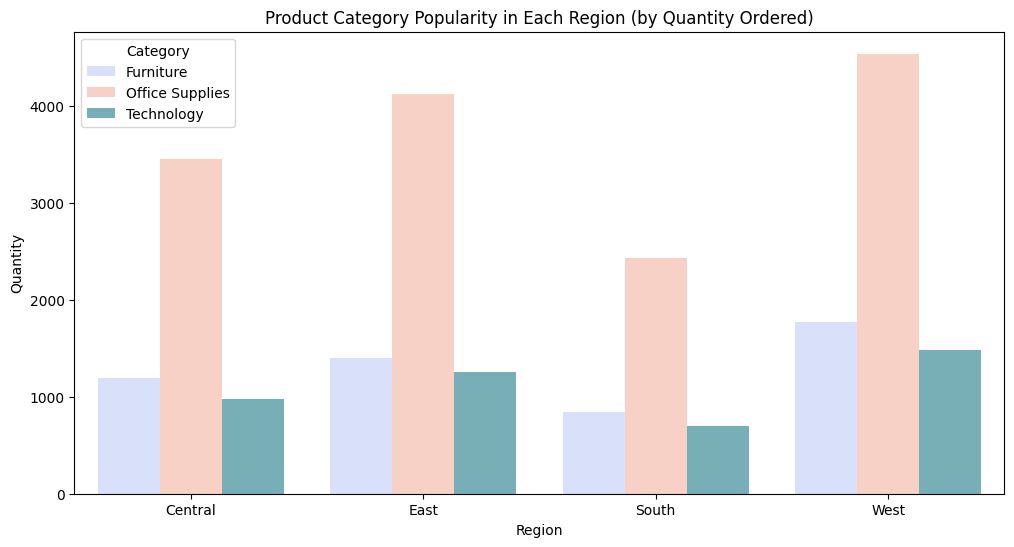

In [23]:
# Group by category and region to get the total quantity
category_region_quantity = df5.groupby(['Region', 'Category'])['Quantity'].sum().reset_index()

# Plot the quantity ordered in each region by product category
plt.figure(figsize=(12,6))
sns.barplot(data=category_region_quantity, x='Region', y='Quantity', hue='Category',palette=palette)
plt.title('Product Category Popularity in Each Region (by Quantity Ordered)')
plt.show()


### 17.What is the relationship between sales and quantity ordered?

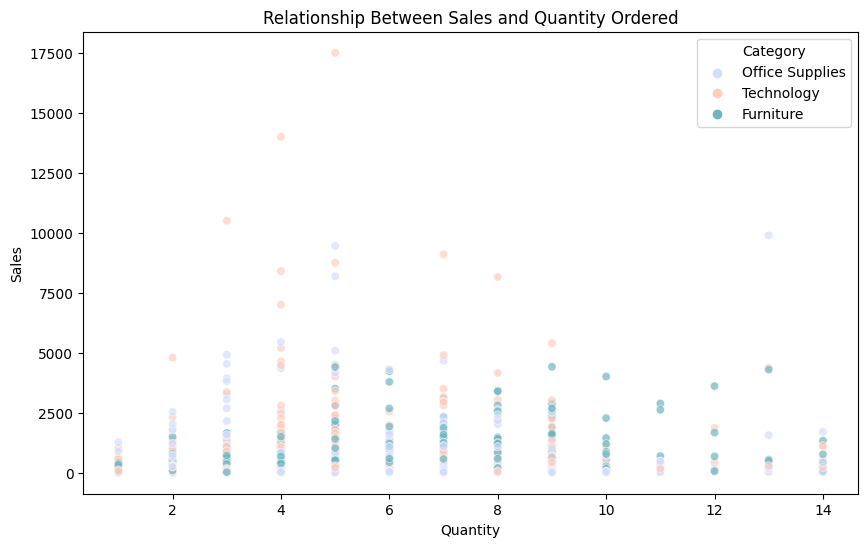

,Quantity,Sales
Quantity,1.000000,0.203861
Sales,0.203861,1.000000


In [24]:
# Scatter plot for Sales vs Quantity ordered
plt.figure(figsize=(10,6))
sns.scatterplot(data=df5, x='Quantity', y='Sales', hue='Category', alpha=0.7,palette=palette)
plt.title('Relationship Between Sales and Quantity Ordered')
plt.show()

# Correlation between quantity and sales
df5[['Quantity', 'Sales']].corr()


### 18.Which customer segments receive the highest discounts?

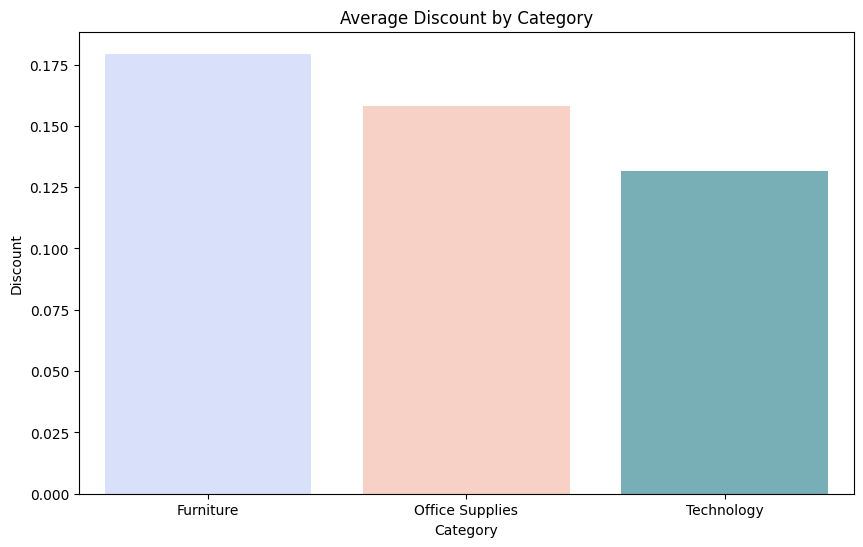

In [25]:
# Check available columns again to choose the right one
df5.columns

# Assuming we want to calculate the average discount by 'Category'
avg_discount_by_category = df5.groupby('Category')['Discount'].mean().reset_index()

# Plot the average discount for each category
plt.figure(figsize=(10,6))
sns.barplot(data=avg_discount_by_category, x='Category', y='Discount',palette=palette)
plt.title('Average Discount by Category')
plt.show()


### 19.What are the sales trends in the top 3 regions?

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

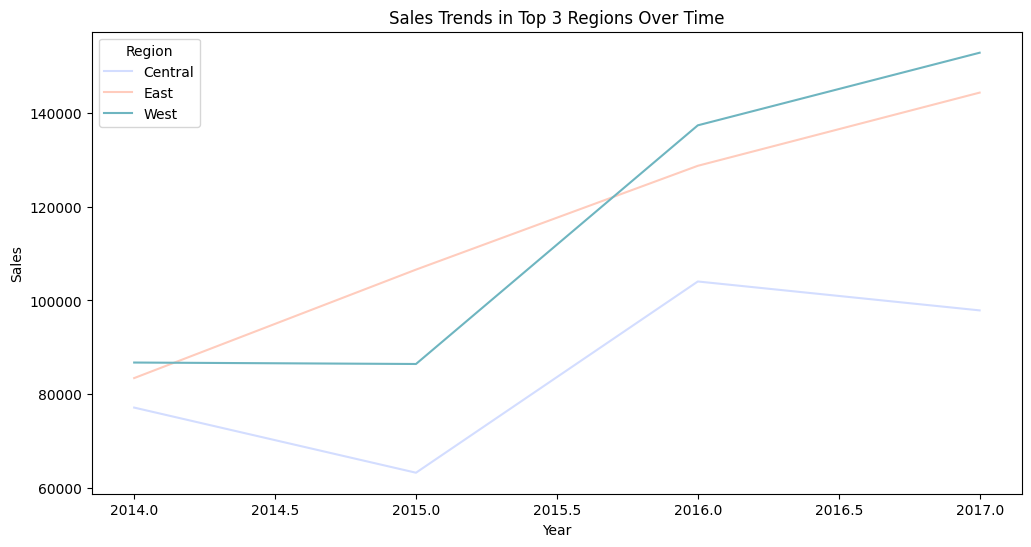

In [26]:
# Find top 3 regions by total sales
top_3_regions = df5.groupby('Region')['Sales'].sum().sort_values(ascending=False).head(3).index

# Filter data for the top 3 regions
top_region_sales = df5[df5['Region'].isin(top_3_regions)]

# Group by year and region to get sales
sales_trends_top_regions = top_region_sales.groupby(['Year', 'Region'])['Sales'].sum().reset_index()

# Plot sales trends in top 3 regions
plt.figure(figsize=(12,6))
sns.lineplot(data=sales_trends_top_regions, x='Year', y='Sales', hue='Region',palette=palette)
plt.title('Sales Trends in Top 3 Regions Over Time')
plt.show()


### 20.What is the distribution of profits across product sub-categories?

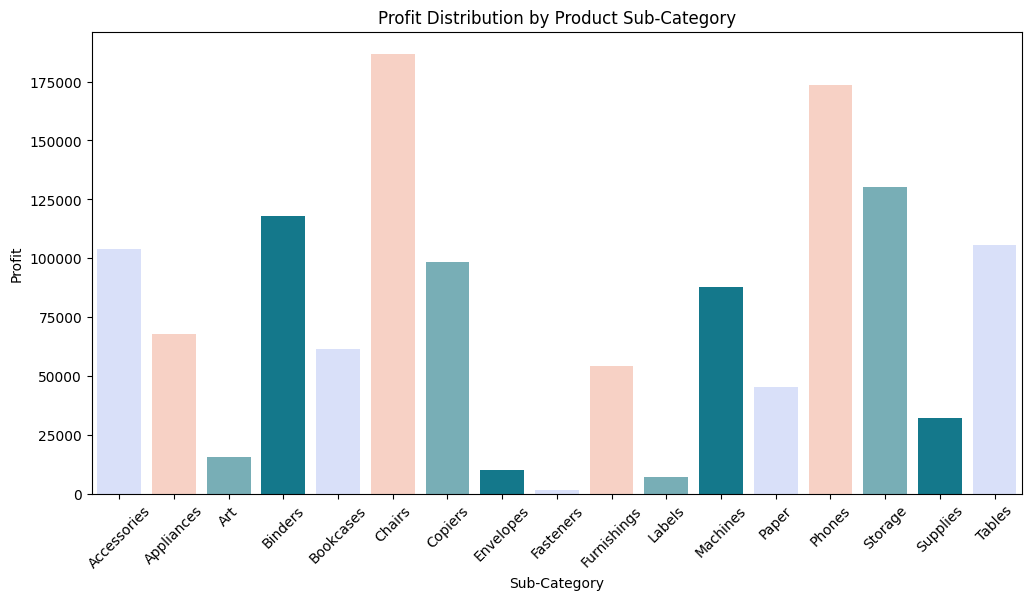

In [27]:
# Group by sub-category for total profit
profit_by_sub_category = df5.groupby('Sub-Category')['Profit'].sum().reset_index()

# Plot the distribution of profits across sub-categories
plt.figure(figsize=(12,6))
sns.barplot(data=profit_by_sub_category, x='Sub-Category', y='Profit',palette=palette)
plt.xticks(rotation=45)
plt.title('Profit Distribution by Product Sub-Category')
plt.show()
